In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [55]:
df=pd.read_csv("gold_price.csv")
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
5,12/23/2022,"1,804.20","1,801.00","1,812.20","1,798.90",105.46K,0.50%
6,12/22/2022,"1,795.30","1,823.80","1,829.30","1,792.70",175.77K,-1.65%
7,12/21/2022,"1,825.40","1,827.90","1,833.80","1,821.30",110.18K,0.00%
8,12/20/2022,"1,825.40","1,796.80","1,832.40","1,793.70",197.50K,1.54%
9,12/19/2022,"1,797.70","1,801.60","1,808.60","1,793.20",86.09K,-0.14%


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [57]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,12/30/2022,"1,294.30","1,284.00","1,220.00","1,314.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


In [58]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-01-02,"1,689.90","1,675.80","1,695.00","1,672.10",0.06K,0.78%
1,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%
2,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
3,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
4,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
...,...,...,...,...,...,...,...
2578,2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
2579,2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
2580,2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
2581,2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%


In [60]:
df.sample(10)

,Date,Price,Open,High,Low,Vol.,Change %
835,2016-03-29,"1,236.40","1,221.80","1,243.70","1,216.00",4.37K,1.28%
805,2016-02-15,"1,208.20","1,236.30","1,236.30","1,191.50",340.80K,-2.52%
1762,2019-10-30,"1,500.20","1,500.20","1,500.20","1,500.20",353.64K,0.64%
98,2013-05-21,"1,378.20","1,392.20","1,397.40","1,359.70",1.30K,-0.48%
2377,2022-03-18,"1,931.70","1,945.70","1,948.30","1,921.60",0.26K,-0.73%
2326,2022-01-06,"1,791.00","1,812.30","1,812.30","1,788.70",0.66K,-1.95%
2226,2021-08-18,"1,782.30","1,785.90","1,793.10","1,777.00",3.86K,-0.19%
814,2016-02-26,"1,220.70","1,220.70","1,220.70","1,220.70",218.71K,-1.46%
1121,2017-05-08,"1,228.70","1,224.20","1,238.00","1,223.90",0.28K,0.02%
452,2014-10-02,"1,215.10","1,213.40","1,224.00","1,209.10",148.82K,-0.03%


In [61]:
df.drop(['Vol.','Change %'] , axis=1 , inplace=True)

In [62]:
NumCols = df.columns.drop(['Date'])
df[NumCols]=df[NumCols].replace(',','' , regex=True).astype(float)
df

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.00,1672.10
1,2013-01-03,1675.6,1688.0,1689.30,1664.30
2,2013-01-04,1649.9,1664.4,1664.40,1630.00
3,2013-01-07,1647.2,1657.3,1663.80,1645.30
4,2013-01-08,1663.2,1651.5,1662.60,1648.80
...,...,...,...,...,...
2578,2022-12-26,1809.7,1805.8,1811.95,1805.55
2579,2022-12-27,1823.1,1808.2,1841.90,1808.00
2580,2022-12-28,1815.8,1822.4,1822.80,1804.20
2581,2022-12-29,1826.0,1812.3,1827.30,1811.20


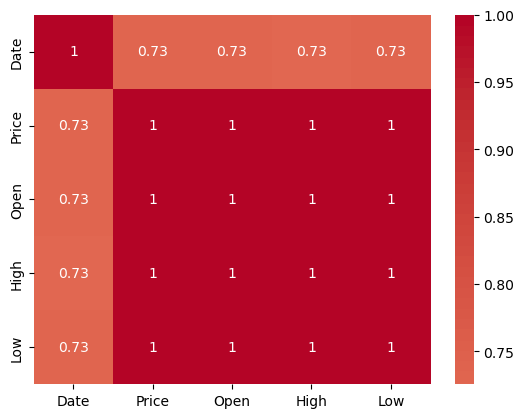

In [63]:
df1=df.corr()
sns.heatmap(df1 ,cmap='coolwarm',
            center=0, annot=True)
plt.show()

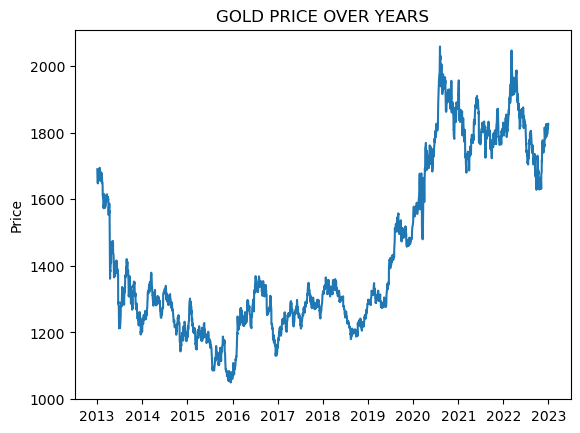

In [67]:
plt.plot(df.Date , df.Price)
plt.title("GOLD PRICE OVER YEARS")
plt.ylabel("Price")
plt.show()

In [64]:
test_size = df[df['Date'].dt.year == 2022].shape[0]

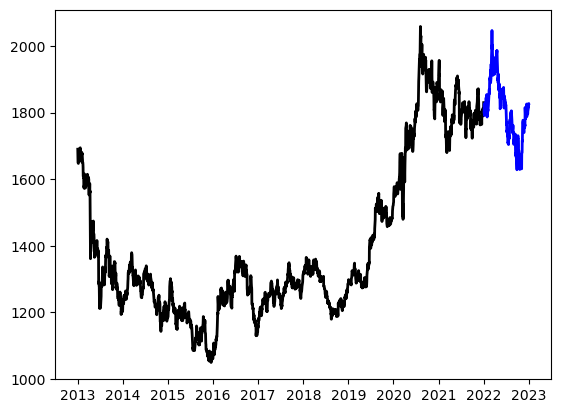

In [68]:
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.show()